In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.dtypes

Day      datetime64[ns]
Time             object
Bio              object
Dust             object
T               float64
H               float64
PM2.5           float64
dtype: object

In [6]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [7]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [8]:
df

,Day,Time,Bio,Dust,T,H,PM2.5,Date_Time
1,2022-05-01,00:03:29,11,34254,25.5,27.0,30.984,2022-05-01 00:03:29
2,2022-05-01,00:07:36,19,33980,25.5,27.0,30.750,2022-05-01 00:07:36
3,2022-05-01,00:11:43,28,33378,25.5,27.0,30.235,2022-05-01 00:11:43
4,2022-05-01,00:15:50,47,33092,25.5,27.0,29.990,2022-05-01 00:15:50
5,2022-05-01,00:19:57,7,32859,25.5,27.0,29.790,2022-05-01 00:19:57
...,...,...,...,...,...,...,...,...
63637,2022-11-20,07:53:02,487,53460,21.0,33.0,46.991,2022-11-20 07:53:02
63638,2022-11-20,07:57:08,578,53567,21.0,33.0,47.079,2022-11-20 07:57:08
63639,2022-11-20,08:01:14,424,51910,21.0,33.0,45.726,2022-11-20 08:01:14
63640,2022-11-20,08:05:20,596,52928,21.0,33.0,46.558,2022-11-20 08:05:20


In [9]:
df.resample('H', on='Date_Time').sum()

,Bio,Dust,T,H,PM2.5
Date_Time,,,,,
2022-05-01 00:00:00,344,456005,357.00,378.0,413.589
2022-05-01 01:00:00,443,477652,371.25,405.0,433.747
2022-05-01 02:00:00,481,457261,346.50,378.0,414.676
2022-05-01 03:00:00,544,484582,371.25,405.0,439.705
2022-05-01 04:00:00,646,506627,371.25,405.0,458.619
...,...,...,...,...,...
2022-11-20 04:00:00,7134,699008,308.00,448.0,617.447
2022-11-20 05:00:00,6999,763015,327.00,480.0,673.093
2022-11-20 06:00:00,6795,777517,316.00,483.0,684.962


In [10]:
#df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df = df.resample('H', on='Date_Time').sum()
df=df.reset_index()
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9

In [11]:
df

,Date_Time,Bio,Dust,T,H,PM2.5
0,1651363200,344,456005,357.00,378.0,413.589
1,1651366800,443,477652,371.25,405.0,433.747
2,1651370400,481,457261,346.50,378.0,414.676
3,1651374000,544,484582,371.25,405.0,439.705
4,1651377600,646,506627,371.25,405.0,458.619
...,...,...,...,...,...,...
4876,1668916800,7134,699008,308.00,448.0,617.447
4877,1668920400,6999,763015,327.00,480.0,673.093
4878,1668924000,6795,777517,316.00,483.0,684.962
4879,1668927600,6258,729375,294.00,462.0,642.312


In [12]:
X=df.drop('PM2.5',axis=1)
Y=df['PM2.5']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [23]:
y_test.shape

(1221,)

In [24]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator)) * 100
    return wi

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  10.874252524336459
--------------------------------------------------
Mean absolute error (MAE) :  6.337147581449773
--------------------------------------------------
R2 score :  0.9990537386316309
--------------------------------------------------
Willmott's Index: 97.65507839856556


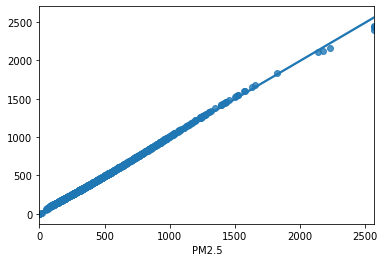

							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.352 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  10.87425253711562
--------------------------------------------------
Mean absolute error (MAE) :  6.3371475650178555
--------------------------------------------------
R2 score :  0.9990537386294068
--------------------------------------------------
Willmott's Index: 97.65507840464583


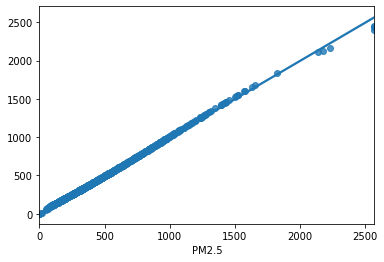

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 0.375 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  26.91930916508821
--------------------------------------------------
Mean absolute error (MAE) :  15.913737100737103
--------------------------------------------------
R2 score :  0.9942011736637689
--------------------------------------------------
Willmott's Index: 94.1114728026375


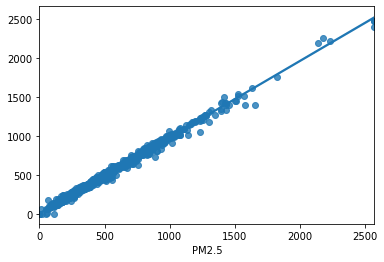

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 0.374 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  4.618948784906691
--------------------------------------------------
Mean absolute error (MAE) :  1.3693964209664442
--------------------------------------------------
R2 score :  0.9998292744283328
--------------------------------------------------
Willmott's Index: 99.49328507705093


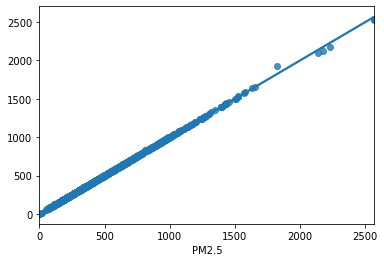

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 1.72 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  10.482454096544323
--------------------------------------------------
Mean absolute error (MAE) :  2.0230229320229296
--------------------------------------------------
R2 score :  0.9991206976769031
--------------------------------------------------
Willmott's Index: 99.25142501219571


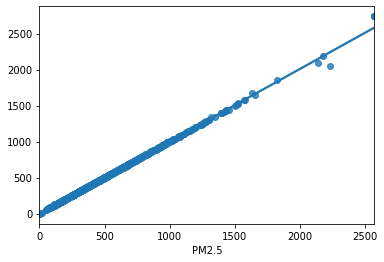

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 0.402 seconds...
							-----------------------------------------------------------



,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,0.999277,0.999054,6.337148,10.874253,0.999054,97.655078
1,0.999277,0.999054,6.337148,10.874253,0.999054,97.655078
2,0.995245,0.994201,15.913737,26.919309,0.994201,94.111473
3,0.999941,0.999829,1.369396,4.618949,0.999829,99.493285
4,1.000000,0.999121,2.023023,10.482454,0.999121,99.251425


In [25]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import BernoulliNB

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
#models.append(('Gaussian NB', BernoulliNB()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    
    
    



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    sns.regplot(x=y_test,y=predictions)
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l, "R2 Score": r2_l,
                    "Willmot Index": wi_l})
comp

(3660, 5)

In [39]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
train_data.shape

(3660, 5, 1)

In [41]:
train_labels=y_train
test_labels=y_test

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [65]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))  # Output layer with single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
#model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
#loss = model.evaluate(test_data, test_labels)
#print('Test Loss:', loss)

# Make predictions
#predictions = model.predict(test_data)



Epoch 1/50
115/115 [==============================] - 34s 78ms/step - loss: 308219.8438 - val_loss: 325069.0312
Epoch 2/50
115/115 [==============================] - 3s 27ms/step - loss: 299129.1562 - val_loss: 318090.1562
Epoch 3/50
115/115 [==============================] - 3s 26ms/step - loss: 292692.3750 - val_loss: 311679.2812
Epoch 4/50
115/115 [==============================] - 3s 27ms/step - loss: 286632.8438 - val_loss: 305546.6250
Epoch 5/50
115/115 [==============================] - 3s 27ms/step - loss: 280806.5625 - val_loss: 299627.9375
Epoch 6/50
115/115 [==============================] - 3s 26ms/step - loss: 275157.3438 - val_loss: 293859.6562
Epoch 7/50
115/115 [==============================] - 3s 26ms/step - loss: 269673.6562 - val_loss: 288254.0625
Epoch 8/50
115/115 [==============================] - 3s 22ms/step - loss: 264320.5312 - val_loss: 282793.9062
Epoch 9/50
115/115 [==============================] - 2s 15ms/step - loss: 259100.2812 - val_loss: 277452.7500


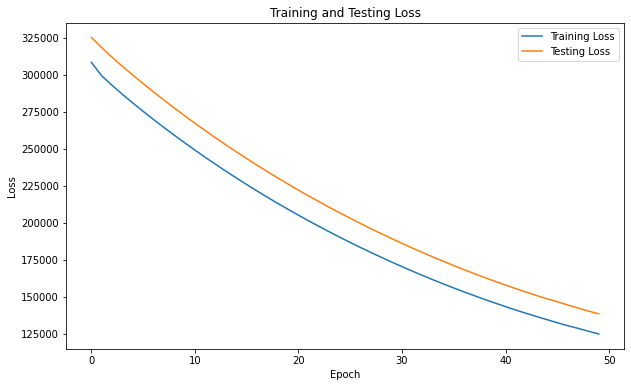

In [66]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Epoch 1/50
115/115 [==============================] - 6s 19ms/step - loss: 310333.2812 - val_loss: 325762.7812
Epoch 2/50
115/115 [==============================] - 1s 13ms/step - loss: 295815.5625 - val_loss: 310002.7188
Epoch 3/50
115/115 [==============================] - 1s 13ms/step - loss: 280728.6562 - val_loss: 294883.3438
Epoch 4/50
115/115 [==============================] - 1s 13ms/step - loss: 266410.0625 - val_loss: 280912.0000
Epoch 5/50
115/115 [==============================] - 1s 13ms/step - loss: 253922.9844 - val_loss: 268695.5938
Epoch 6/50
115/115 [==============================] - 1s 13ms/step - loss: 242586.7031 - val_loss: 257272.4844
Epoch 7/50
115/115 [==============================] - 1s 13ms/step - loss: 231698.0312 - val_loss: 246215.0781
Epoch 8/50
115/115 [==============================] - 1s 13ms/step - loss: 220771.1094 - val_loss: 233090.9375
Epoch 9/50
115/115 [==============================] - 1s 13ms/step - loss: 206275.6562 - val_loss: 217522.7812
E

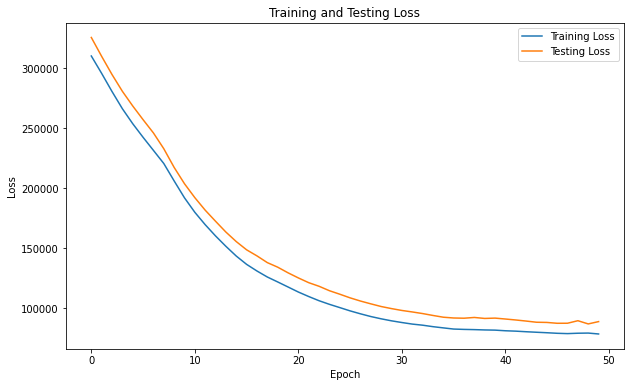

In [67]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and record training history
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Variable Naming Rules

### Rule-1

### Rule-2

### Rule-3

### Rule-4